In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## start comparaison 
## on va comparer le DNN avec un RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
## end comparaison


import tensorflow as tf
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.datasets import mnist, fashion_mnist


In [2]:
random_state = 42

tf.random.set_seed(
    random_state
)

"""https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network"""

# utilities

In [3]:
## plot and evaluate model

def plot_cm_display(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.show()


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()



# Data

In [4]:
### integrated data "mnist" from tensorflow
### only use this method for library-integrated data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [5]:
#60k imgs with 28 pixels by 28 pixels
X_train.shape

(60000, 28, 28)

In [6]:
type(X_train)

numpy.ndarray

# EDA


In [34]:
type(X_train)

numpy.ndarray

In [10]:
print("X_train shape:", X_train.shape)
print("X_train data type:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train data type:", y_train.dtype)

X_train shape: (60000, 28, 28)
X_train data type: uint8
y_train shape: (60000,)
y_train data type: uint8


Label: 9


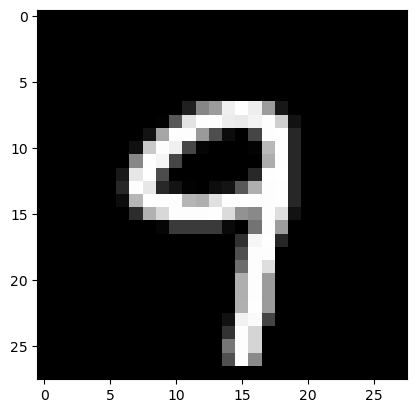

In [19]:
from random import randint

i = randint(0, 59_999)
plt.imshow(X_train[i], cmap='gray')

print("Label:", y_train[i])

In [30]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

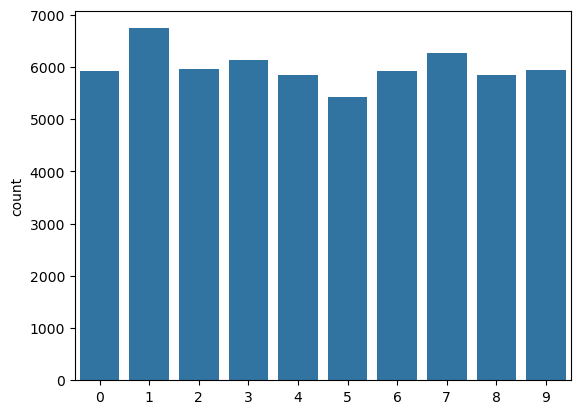

In [31]:
sns.countplot(x=y_train)
plt.show()

In [33]:
print("X_train overall mean:", np.mean(X_train))

X_train overall mean: 33.318421449829934


In [ ]:
X_zeros = X_train[]

# Models